In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

player_data <- read_csv("data/players.csv")
#session_data <- read_csv("data/sessions.csv")

#just some filler code for now
#tidy_session_data <- session_data |>
#                        mutate(start_time = as_datetime(start_time, format="%d/%m/%Y %H:%M")) |> #convert to date object
#                        mutate(end_time = as_datetime(end_time, format="%d/%m/%Y %H:%M")) |> #convert to date object
#                        mutate(session_length = end_time - start_time) #get session length


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


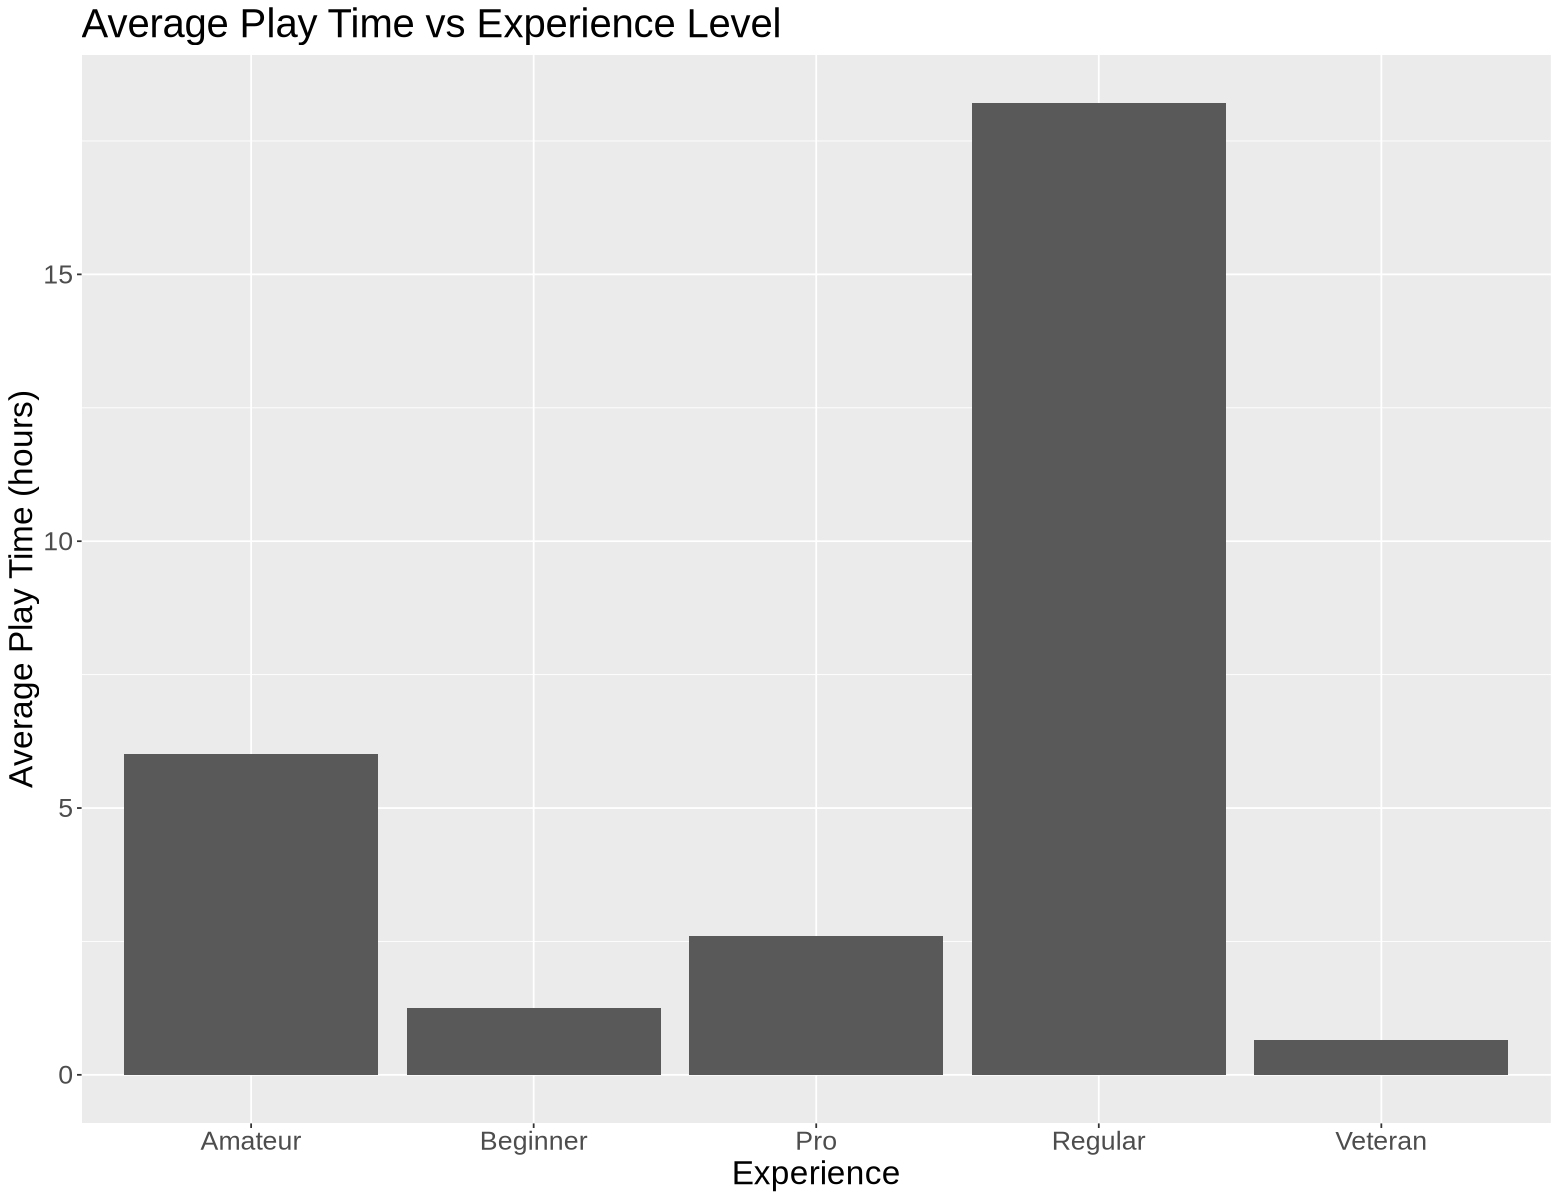

In [19]:
# For Experience vs Played Hours
options(repr.plot.width=13, repr.plot.height=10)

player_data_average_graph <- player_data |>
                        select(experience, played_hours) |> # only using experience and played_hours
                        mutate(experience = as.factor(experience)) |> # converts experience from chr to fct
                        group_by(experience) |>
                        summarize(average = mean(played_hours)) |> # average play hours for each experience group
                        ggplot(aes(experience, average)) + # graph
                        geom_bar(stat="identity") +
                        labs(x="Experience", y="Average Play Time (hours)", title="Average Play Time vs Experience Level") +
                        theme(text=element_text(size=20))

player_data_average_graph